### Data Preparation

In [3]:
import requests
import pandas as pd
import numpy as np
import os
import requests
from dotenv import load_dotenv

In [114]:
from dune_client.client import DuneClient

load_dotenv()
dune = DuneClient("$DUNE_WHALES_MOVES")
API_KEY = os.getenv("COINGECKO_API_KEY")


In [115]:
# Fetching Ezxecution_id for the Dune's query 

query_id = 6184996  

resp = requests.post(
    f"https://api.dune.com/api/v1/query/{query_id}/execute",
    headers={"X-Dune-Api-Key": os.getenv("DUNE_WHALES_API")}
)

data = resp.json()
print(data)


{'execution_id': '01K9Z2Y2XA5SX6RVBP2ZH85CFF', 'state': 'QUERY_STATE_EXECUTING'}


In [ ]:
"""
import os
import requests
from dotenv import load_dotenv

load_dotenv()
dune_api_key = os.getenv("DUNE_WHALES_API")

query_ids = [6184996]

headers = {"X-DUNE-API-KEY": dune_api_key}

for query_id in query_ids:
    url = f"https://api.dune.com/api/v1/query/{query_id}/execute"
    response = requests.post(url, headers=headers)
    print(f"Query {query_id}: {response.text}")
    """

Query 6184996: {"execution_id":"01K9Z3P9P06BYBVAJ0HX5X9AFP","state":"QUERY_STATE_PENDING"}


In [123]:
import os
import requests
import pandas as pd
import time
from dotenv import load_dotenv

# --- Load environment variables ---
load_dotenv()
DUNE_API_KEY = os.getenv("DUNE_WHALES_API")

if not DUNE_API_KEY:
    raise ValueError("❌ Missing DUNE_API_KEY. Make sure it's in your .env file.")

# --- Query setup ---
QUERY_ID = "6184996"
headers = {"x-dune-api-key": DUNE_API_KEY}

# --- 1. Trigger new execution ---
execute_url = f"https://api.dune.com/api/v1/query/{QUERY_ID}/execute"
execute_response = requests.post(execute_url, headers=headers)
execute_data = execute_response.json()
print("🔍 Raw response from Dune:", execute_data)

execution_id = execute_data.get("execution_id")
if not execution_id:
    raise ValueError(f"❌ No execution_id found. Response:\n{execute_data}")

print(f"🚀 Query started — Execution ID: {execution_id}")

# --- 2. Poll for completion ---
status_url = f"https://api.dune.com/api/v1/execution/{execution_id}/status"
results_url = f"https://api.dune.com/api/v1/execution/{execution_id}/results"

while True:
    status_response = requests.get(status_url, headers=headers)
    state = status_response.json().get("state")
    print("State:", state)

    if state == "QUERY_STATE_COMPLETED":
        print("✅ Query complete!")
        break
    elif state == "QUERY_STATE_FAILED":
        raise RuntimeError("❌ Query failed:", status_response.json())
    else:
        time.sleep(10)

# --- 3. Fetch results ---
results_response = requests.get(results_url, headers=headers)
results_data = results_response.json()

rows = results_data["result"]["rows"]
df_whales = pd.DataFrame(rows)
print(f"✅ Retrieved {len(df_whales)} rows")
print(df_whales.head())


🔍 Raw response from Dune: {'execution_id': '01K9Z3P9P06BYBVAJ0HX5X9AFP', 'state': 'QUERY_STATE_EXECUTING'}
🚀 Query started — Execution ID: 01K9Z3P9P06BYBVAJ0HX5X9AFP
State: QUERY_STATE_EXECUTING
State: QUERY_STATE_EXECUTING
State: QUERY_STATE_EXECUTING
State: QUERY_STATE_EXECUTING
State: QUERY_STATE_COMPLETED
✅ Query complete!
✅ Retrieved 1096 rows
   accumulation_phase activity_level  avg_whale_tx_size_weth  bearish_signal  \
0                   0           high              668.077169               0   
1                   0           high              543.278983               0   
2                   0           high              391.003046               0   
3                   0           high              434.838114               0   
4                   0           high              528.532670               1   

                    block_date  bullish_signal  cv_whale_tx_size  \
0  2025-11-13 00:00:00.000 UTC               0            4.6388   
1  2025-11-12 00:00:00.000 UTC  

In [124]:
df_whales.shape

(1096, 87)

In [125]:
df_whales.head(10)

,accumulation_phase,activity_level,avg_whale_tx_size_weth,bearish_signal,block_date,bullish_signal,cv_whale_tx_size,data_quality_score,day_of_month,day_of_week,...,volume_uptrend,volume_vs_ma30,volume_vs_ma7,volume_zscore_30d,volume_zscore_7d,whale_exchange_deposits_weth,whale_exchange_withdrawals_weth,whale_net_exchange_flow_weth,whale_tx_count,withdrawal_tx_count
0,0,high,668.077169,0,2025-11-13 00:00:00.000 UTC,0,4.6388,1,13,4,...,1,1.4635,1.3861,1.7177,1.0069,11.3513,42.0006,30.6492,15352,3
1,0,high,543.278983,0,2025-11-12 00:00:00.000 UTC,0,4.5054,1,12,3,...,0,1.2541,1.3312,0.9396,0.8167,182.8842,179.1008,-3.7834,18228,7
2,0,high,391.003046,0,2025-11-11 00:00:00.000 UTC,0,4.4502,1,11,2,...,0,0.9093,1.0646,-0.3331,0.1504,230.6338,120.5799,-110.0539,18518,13
3,0,high,434.838114,0,2025-11-10 00:00:00.000 UTC,0,4.5667,1,10,1,...,0,1.0250,1.2767,0.0876,0.6114,18.8113,6.8502,-11.9611,19397,5
4,0,high,528.532670,1,2025-11-09 00:00:00.000 UTC,0,4.3283,1,9,7,...,0,1.4931,1.7852,1.6623,1.6884,8.4347,18.0003,9.5655,22302,5
5,0,high,284.420120,0,2025-11-08 00:00:00.000 UTC,0,5.3336,1,8,6,...,0,0.8495,1.1387,-0.5096,0.3914,109.1730,12.2097,-96.9632,22240,4
6,0,high,195.899112,0,2025-11-07 00:00:00.000 UTC,0,5.3341,1,7,5,...,0,0.3315,0.4360,-2.2579,-1.5258,266.6125,22.1102,-244.5023,14068,4
7,0,high,350.787762,0,2025-11-06 00:00:00.000 UTC,0,5.4214,1,6,4,...,0,0.6378,0.7720,-1.3799,-0.9145,46.1323,1320.3430,1274.2107,15093,5
8,0,high,380.107502,0,2025-11-05 00:00:00.000 UTC,0,5.0356,1,5,3,...,0,0.6188,0.7355,-1.4873,-1.1671,373.2366,48.0168,-325.2199,13587,3
9,0,high,485.558049,0,2025-11-04 00:00:00.000 UTC,0,4.2060,1,4,2,...,0,0.6369,0.7365,-1.4854,-1.4020,201.7805,12.1259,-189.6545,11237,8


In [126]:
df_whales.isnull().sum()

accumulation_phase                 0
activity_level                     0
avg_whale_tx_size_weth             0
bearish_signal                     0
block_date                         0
                                  ..
whale_exchange_deposits_weth       0
whale_exchange_withdrawals_weth    0
whale_net_exchange_flow_weth       0
whale_tx_count                     0
withdrawal_tx_count                0
Length: 87, dtype: int64

In [ ]:
df_whales.columns

Index(['accumulation_phase', 'activity_level', 'avg_whale_tx_size_weth',
       'bearish_signal', 'block_date', 'bullish_signal', 'cv_whale_tx_size',
       'data_quality_score', 'day_of_month', 'day_of_week', 'deposit_tx_count',
       'deposit_withdrawal_ratio', 'distribution_phase', 'exchange_tx_ratio',
       'extreme_deposit_flag', 'extreme_withdrawal_flag',
       'high_concentration_flag', 'inter_exchange_transfers_weth',
       'inter_exchange_tx_count', 'iqr_whale_tx_size', 'is_month_end',
       'is_month_start', 'is_quarter_end', 'is_weekend', 'known_whale_ratio',
       'known_whale_tx_count', 'known_whale_volume_weth',
       'max_whale_tx_size_weth', 'median_whale_tx_size_weth',
       'mega_whale_dominance_flag', 'mega_whale_ratio', 'mega_whale_tx_count',
       'mega_whale_volume_weth', 'min_whale_tx_size_weth', 'month',
       'net_flow_direction_change', 'net_flow_ma30', 'net_flow_ma7',
       'net_flow_max7', 'net_flow_min7', 'net_flow_range_7d',
       'net_flow_vs_

In [129]:
"""
Fetch ETH and BTC prices from CoinGecko PRO and merge with whale data
"""

import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
import time
from typing import Dict, List

# ==========================================
# CONFIGURATION
# ==========================================


COINGECKO_API_KEY = API_KEY  

# CoinGecko Pro API
COINGECKO_API_BASE = 'https://pro-api.coingecko.com/api/v3/coins/{symbol}/market_chart'

# Output file
OUTPUT_FILE = 'whale_prices_ml_ready.csv'

# Rate limiting (Pro tier is more generous, but still be respectful)
REQUEST_DELAY = 0.5  # seconds between requests

print("✓ Configuration loaded")
print(f"  API: {COINGECKO_API_BASE}")
print(f"  Output file: {OUTPUT_FILE}")

✓ Configuration loaded
  API: https://pro-api.coingecko.com/api/v3/coins/{symbol}/market_chart
  Output file: whale_prices_ml_ready.csv


In [130]:
def fetch_coingecko_price_range(coin_id: str, from_date: str, to_date: str) -> pd.DataFrame:
    """
    Fetch price data for specific date range using CoinGecko Pro API
    
    Args:
        coin_id: e.g. 'ethereum' or 'bitcoin'
        from_date: start date 'YYYY-MM-DD'
        to_date: end date 'YYYY-MM-DD'
    
    Returns:
        DataFrame with daily prices
    """
    print(f"\nFetching {coin_id.upper()} price data from {from_date} to {to_date}...")
    
    # Convert dates to Unix timestamps
    from_ts = int(pd.Timestamp(from_date).timestamp())
    to_ts = int(pd.Timestamp(to_date).timestamp())
    
    # ✅ Use coin_id instead of undefined symbol
    url = f"https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    
    headers = {
        'accept': 'application/json',
        'x-cg-pro-api-key': COINGECKO_API_KEY
    }
    
    params = {
        'vs_currency': 'usd',
        'from': from_ts,
        'to': to_ts
    }
    
    print(f"  Request URL: {url}")
    print(f"  Using API key: {COINGECKO_API_KEY[:8]}...{COINGECKO_API_KEY[-4:]}")
    
    try:
        response = requests.get(url, headers=headers, params=params)
        print(f"  Response status: {response.status_code}")
        response.raise_for_status()
        
        data = response.json()
        
        if 'prices' not in data:
            print(f"✗ Unexpected response format: {list(data.keys())}")
            return pd.DataFrame()
        
        prices = data['prices']
        df = pd.DataFrame({
            'timestamp': [p[0] for p in prices],
            'price': [p[1] for p in prices]
        })
        
        df['date'] = pd.to_datetime(df['timestamp'], unit='ms').dt.date
        df = df.groupby('date', as_index=False).agg({'price': 'last'})
        
        print(f"✓ Fetched {len(df)} days of {coin_id.upper()} data")
        print(f"  Price range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
        return df
        
    except requests.exceptions.HTTPError as e:
        print(f"✗ HTTP Error fetching {coin_id} data: {e}")
        if hasattr(e, 'response') and e.response is not None:
            print(f"  Response: {e.response.text[:300]}")
        return pd.DataFrame()
    except Exception as e:
        print(f"✗ Error fetching {coin_id} data: {e}")
        return pd.DataFrame()

print("✓ Fixed price fetching function loaded")


✓ Fixed price fetching function loaded


In [131]:
def add_price_features(df: pd.DataFrame, price_col: str, prefix: str) -> pd.DataFrame:
    """
    Add price-based features for ML
    """
    print(f"\nCreating {prefix.upper()} price features...")
    
    # Sort by date to ensure proper ordering
    df = df.sort_values('block_date').reset_index(drop=True)
    
    # Daily returns
    df[f'{prefix}_daily_return'] = df[price_col].pct_change()
    
    # Log returns
    df[f'{prefix}_log_return'] = np.log(df[price_col] / df[price_col].shift(1))
    
    # Price moving averages
    df[f'{prefix}_price_ma7'] = df[price_col].rolling(7, min_periods=1).mean()
    df[f'{prefix}_price_ma30'] = df[price_col].rolling(30, min_periods=1).mean()
    df[f'{prefix}_price_ma90'] = df[price_col].rolling(90, min_periods=1).mean()
    
    # Price vs MA ratios
    df[f'{prefix}_price_vs_ma7'] = df[price_col] / df[f'{prefix}_price_ma7']
    df[f'{prefix}_price_vs_ma30'] = df[price_col] / df[f'{prefix}_price_ma30']
    
    # Volatility
    df[f'{prefix}_volatility_7d'] = df[f'{prefix}_daily_return'].rolling(7, min_periods=1).std()
    df[f'{prefix}_volatility_30d'] = df[f'{prefix}_daily_return'].rolling(30, min_periods=1).std()
    
    # Price range
    df[f'{prefix}_range_7d'] = (
        df[price_col].rolling(7, min_periods=1).max() - 
        df[price_col].rolling(7, min_periods=1).min()
    ) / df[price_col]
    
    # Cumulative returns
    df[f'{prefix}_return_7d'] = df[price_col].pct_change(7)
    df[f'{prefix}_return_30d'] = df[price_col].pct_change(30)
    
    # RSI-like momentum
    returns = df[f'{prefix}_daily_return']
    gains = returns.where(returns > 0, 0).rolling(14, min_periods=1).mean()
    losses = -returns.where(returns < 0, 0).rolling(14, min_periods=1).mean()
    rs = gains / (losses + 1e-10)
    df[f'{prefix}_momentum_rsi'] = 100 - (100 / (1 + rs))
    
    # Trend indicators
    df[f'{prefix}_uptrend'] = (
        (df[price_col] > df[f'{prefix}_price_ma7']) & 
        (df[f'{prefix}_price_ma7'] > df[f'{prefix}_price_ma30'])
    ).astype(int)
    
    df[f'{prefix}_downtrend'] = (
        (df[price_col] < df[f'{prefix}_price_ma7']) & 
        (df[f'{prefix}_price_ma7'] < df[f'{prefix}_price_ma30'])
    ).astype(int)
    
    # Lagged features
    for lag in [1, 3, 7]:
        df[f'{prefix}_return_lag{lag}'] = df[f'{prefix}_daily_return'].shift(lag)
    
    print(f"✓ Created {len([c for c in df.columns if c.startswith(prefix)]) - len([c for c in df.columns if c.startswith(prefix) and 'lag' not in c and 'return' not in c and 'price' not in c])} {prefix.upper()} features")
    
    return df

print("✓ Price feature functions loaded")

✓ Price feature functions loaded


In [132]:
def add_correlation_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add ETH-BTC correlation features
    """
    print("\nCreating ETH-BTC correlation features...")
    
    # ETH/BTC ratio
    df['eth_btc_ratio'] = df['eth_price'] / df['btc_price']
    df['eth_btc_ratio_ma7'] = df['eth_btc_ratio'].rolling(7, min_periods=1).mean()
    df['eth_btc_ratio_vs_ma7'] = df['eth_btc_ratio'] / df['eth_btc_ratio_ma7']
    
    # Rolling correlation
    df['eth_btc_corr_30d'] = (
        df['eth_daily_return']
        .rolling(30, min_periods=20)
        .corr(df['btc_daily_return'])
    )
    
    # Divergence
    df['eth_btc_divergence'] = (
        ((df['eth_daily_return'] > 0) & (df['btc_daily_return'] < 0)) |
        ((df['eth_daily_return'] < 0) & (df['btc_daily_return'] > 0))
    ).astype(int)
    
    # Outperformance
    df['eth_outperformance'] = df['eth_daily_return'] - df['btc_daily_return']
    df['eth_outperformance_7d'] = df['eth_outperformance'].rolling(7, min_periods=1).mean()
    
    print(f"✓ Created correlation features")
    
    return df

def create_target_variable(df: pd.DataFrame, price_col: str = 'eth_price') -> pd.DataFrame:
    """
    Create target variable: next day price direction
    """
    print("\nCreating target variable...")
    
    # Next day return
    df['next_day_return'] = df[price_col].pct_change().shift(-1)
    
    # Binary target
    df['next_day_price_direction'] = (df['next_day_return'] > 0).astype(int)
    
    # Multi-class target (3 classes)
    df['next_day_price_movement'] = pd.cut(
        df['next_day_return'],
        bins=[-np.inf, -0.02, 0.02, np.inf],
        labels=['down', 'neutral', 'up']
    )
    
    print(f"✓ Target variable created")
    print(f"  Up (1):   {df['next_day_price_direction'].sum()} ({df['next_day_price_direction'].mean()*100:.1f}%)")
    print(f"  Down (0): {(~df['next_day_price_direction'].astype(bool)).sum()} ({(1-df['next_day_price_direction'].mean())*100:.1f}%)")
    
    return df

print("✓ Correlation and target functions loaded")

✓ Correlation and target functions loaded


In [133]:
# Check the whale data that's already loaded
print("="*70)
print(" CHECKING WHALE DATA ".center(70))
print("="*70)

# Use your existing df_Whales
print(f"\n✓ Whale data already loaded: {len(df_whales)} rows")
print(f"  Columns: {len(df_whales.columns)}")
print(f"\nFirst few column names:")
print(list(df_whales.columns[:10]))

# Ensure block_date is date type
df_whales['block_date'] = pd.to_datetime(df_whales['block_date']).dt.date

print(f"\n✓ Date range: {df_whales['block_date'].min()} to {df_whales['block_date'].max()}")

# Check for required whale columns
required_whale_cols = ['whale_tx_count', 'total_whale_volume_weth', 
                       'whale_exchange_deposits_weth', 'whale_exchange_withdrawals_weth']
missing = [col for col in required_whale_cols if col not in df_whales.columns]

if missing:
    print(f"\n⚠️  Missing expected columns: {missing}")
else:
    print(f"\n✓ All expected whale columns present")

                         CHECKING WHALE DATA                          

✓ Whale data already loaded: 1096 rows
  Columns: 87

First few column names:
['accumulation_phase', 'activity_level', 'avg_whale_tx_size_weth', 'bearish_signal', 'block_date', 'bullish_signal', 'cv_whale_tx_size', 'data_quality_score', 'day_of_month', 'day_of_week']

✓ Date range: 2022-11-14 to 2025-11-13

✓ All expected whale columns present


In [134]:
print("\n" + "="*70)
print(" FETCHING ETH PRICE DATA ".center(70))
print("="*70)

# Get date range from whale data
min_date = df_whales['block_date'].min()
max_date = df_whales['block_date'].max()

# Add buffer for MA calculations
fetch_from = pd.to_datetime(min_date) - timedelta(days=100)
fetch_to = pd.to_datetime(max_date)

print(f"\nDate range needed: {fetch_from.date()} to {fetch_to.date()}")
print(f"Days to fetch: {(fetch_to - fetch_from).days}")

# Fetch ETH prices
df_eth = fetch_coingecko_price_range(
    'ethereum',
    fetch_from.strftime('%Y-%m-%d'),
    fetch_to.strftime('%Y-%m-%d')
)

if df_eth.empty:
    print("\n✗ ERROR: Failed to fetch ETH price data!")
    print("  Check your API key and network connection")
else:
    df_eth = df_eth.rename(columns={'price': 'eth_price'})
    print(f"\n✓ ETH data ready: {len(df_eth)} days")
    
    # Wait before next request
    time.sleep(REQUEST_DELAY)


                       FETCHING ETH PRICE DATA                        

Date range needed: 2022-08-06 to 2025-11-13
Days to fetch: 1195

Fetching ETHEREUM price data from 2022-08-06 to 2025-11-13...
  Request URL: https://pro-api.coingecko.com/api/v3/coins/ethereum/market_chart/range
  Using API key: CG-nm5yn...MWbP
  Response status: 200
✓ Fetched 1196 days of ETHEREUM data
  Price range: $1095.18 - $4829.23

✓ ETH data ready: 1196 days


In [135]:
print("\n" + "="*70)
print(" FETCHING BTC PRICE DATA ".center(70))
print("="*70)

# Fetch BTC prices
df_btc = fetch_coingecko_price_range(
    'bitcoin',
    fetch_from.strftime('%Y-%m-%d'),
    fetch_to.strftime('%Y-%m-%d')
)

if df_btc.empty:
    print("\n✗ ERROR: Failed to fetch BTC price data!")
    print("  Check your API key and network connection")
else:
    df_btc = df_btc.rename(columns={'price': 'btc_price'})
    print(f"\n✓ BTC data ready: {len(df_btc)} days")


                       FETCHING BTC PRICE DATA                        

Fetching BITCOIN price data from 2022-08-06 to 2025-11-13...
  Request URL: https://pro-api.coingecko.com/api/v3/coins/bitcoin/market_chart/range
  Using API key: CG-nm5yn...MWbP
  Response status: 200
✓ Fetched 1196 days of BITCOIN data
  Price range: $15742.44 - $124773.51

✓ BTC data ready: 1196 days


In [137]:
print("\n" + "="*70)
print(" MERGING WHALE DATA WITH PRICES ".center(70))
print("="*70)

# Merge ETH prices
df_merged = pd.merge(
    df_whales,  # Note: using df_Whales (your variable name)
    df_eth,
    left_on='block_date',
    right_on='date',
    how='inner'
)
df_merged = df_merged.drop('date', axis=1)

print(f"✓ Merged ETH prices: {len(df_merged)} rows")

# Merge BTC prices
df_merged = pd.merge(
    df_merged,
    df_btc,
    left_on='block_date',
    right_on='date',
    how='inner'
)
df_merged = df_merged.drop('date', axis=1)

print(f"✓ Merged BTC prices: {len(df_merged)} rows")
print(f"  Final date range: {df_merged['block_date'].min()} to {df_merged['block_date'].max()}")
print(f"  Total columns: {len(df_merged.columns)}")


                    MERGING WHALE DATA WITH PRICES                    
✓ Merged ETH prices: 1096 rows
✓ Merged BTC prices: 1096 rows
  Final date range: 2022-11-14 to 2025-11-13
  Total columns: 89


In [139]:
print("\n" + "="*70)
print(" MERGING WHALE DATA WITH PRICES ".center(70))
print("="*70)

# Merge ETH prices
df_merged = pd.merge(
    df_whales,  # Note: using df_Whales (your variable name)
    df_eth,
    left_on='block_date',
    right_on='date',
    how='inner'
)
df_merged = df_merged.drop('date', axis=1)

print(f"✓ Merged ETH prices: {len(df_merged)} rows")

# Merge BTC prices
df_merged = pd.merge(
    df_merged,
    df_btc,
    left_on='block_date',
    right_on='date',
    how='inner'
)
df_merged = df_merged.drop('date', axis=1)

print(f"✓ Merged BTC prices: {len(df_merged)} rows")
print(f"  Final date range: {df_merged['block_date'].min()} to {df_merged['block_date'].max()}")
print(f"  Total columns: {len(df_merged.columns)}")


                    MERGING WHALE DATA WITH PRICES                    
✓ Merged ETH prices: 1096 rows
✓ Merged BTC prices: 1096 rows
  Final date range: 2022-11-14 to 2025-11-13
  Total columns: 89


In [140]:
print("\n" + "="*70)
print(" CREATING PRICE-BASED FEATURES ".center(70))
print("="*70)

# Ensure proper date ordering
df_merged = df_merged.sort_values('block_date').reset_index(drop=True)

# Add ETH features
df_merged = add_price_features(df_merged, 'eth_price', 'eth')

# Add BTC features
df_merged = add_price_features(df_merged, 'btc_price', 'btc')

# Add correlation features
df_merged = add_correlation_features(df_merged)

# Create target variable
df_merged = create_target_variable(df_merged, 'eth_price')

print(f"\n✓ Feature engineering complete")
print(f"  Total columns now: {len(df_merged.columns)}")


                    CREATING PRICE-BASED FEATURES                     

Creating ETH price features...
✓ Created 13 ETH features

Creating BTC price features...
✓ Created 13 BTC features

Creating ETH-BTC correlation features...
✓ Created correlation features

Creating target variable...
✓ Target variable created
  Up (1):   563 (51.4%)
  Down (0): 533 (48.6%)

✓ Feature engineering complete
  Total columns now: 135


In [141]:
print("\n" + "="*70)
print(" FINAL DATA CLEANUP ".center(70))
print("="*70)

# Check for NaN values
nan_counts = df_merged.isna().sum()
nan_cols = nan_counts[nan_counts > 0]

if len(nan_cols) > 0:
    print(f"\nColumns with NaN values:")
    for col, count in list(nan_cols.items())[:20]:  # Show first 20
        print(f"  {col}: {count} ({count/len(df_merged)*100:.1f}%)")
    
    if len(nan_cols) > 20:
        print(f"  ... and {len(nan_cols) - 20} more columns")

# Drop rows where target is NaN (last row typically)
df_final = df_merged.dropna(subset=['next_day_price_direction']).copy()

print(f"\n✓ Final dataset: {len(df_final)} rows, {len(df_final.columns)} columns")
print(f"  Rows dropped due to NaN target: {len(df_merged) - len(df_final)}")

# Save
df_final.to_csv(OUTPUT_FILE, index=False)

print(f"\n✓ Saved to: {OUTPUT_FILE}")
print(f"  File size: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


                          FINAL DATA CLEANUP                          

Columns with NaN values:
  prev_day_net_flow: 1 (0.1%)
  prev_day_senders: 1 (0.1%)
  prev_day_tx_count: 1 (0.1%)
  prev_day_volume: 1 (0.1%)
  volume_std30: 1 (0.1%)
  volume_std7: 1 (0.1%)
  eth_daily_return: 1 (0.1%)
  eth_log_return: 1 (0.1%)
  eth_volatility_7d: 2 (0.2%)
  eth_volatility_30d: 2 (0.2%)
  eth_return_7d: 7 (0.6%)
  eth_return_30d: 30 (2.7%)
  eth_return_lag1: 2 (0.2%)
  eth_return_lag3: 4 (0.4%)
  eth_return_lag7: 8 (0.7%)
  btc_daily_return: 1 (0.1%)
  btc_log_return: 1 (0.1%)
  btc_volatility_7d: 2 (0.2%)
  btc_volatility_30d: 2 (0.2%)
  btc_return_7d: 7 (0.6%)
  ... and 9 more columns

✓ Final dataset: 1096 rows, 135 columns
  Rows dropped due to NaN target: 0

✓ Saved to: whale_prices_ml_ready.csv
  File size: 1.25 MB


In [142]:
print("\n" + "="*70)
print(" FINAL SUMMARY ".center(70))
print("="*70)

print(f"\n📊 Dataset Overview:")
print(f"  Total rows: {len(df_final):,}")
print(f"  Total features: {len(df_final.columns) - 2}")
print(f"  Date range: {df_final['block_date'].min()} to {df_final['block_date'].max()}")
print(f"  Days covered: {(pd.to_datetime(df_final['block_date'].max()) - pd.to_datetime(df_final['block_date'].min())).days}")

print(f"\n📈 Feature Categories:")
whale_features = [c for c in df_final.columns if any(x in c for x in ['whale', 'exchange', 'deposit', 'withdrawal'])]
eth_features = [c for c in df_final.columns if c.startswith('eth_') and 'btc' not in c]
btc_features = [c for c in df_final.columns if c.startswith('btc_')]
corr_features = [c for c in df_final.columns if 'eth_btc' in c or 'outperformance' in c]

print(f"  Whale transaction features: {len(whale_features)}")
print(f"  ETH price features: {len(eth_features)}")
print(f"  BTC price features: {len(btc_features)}")
print(f"  Correlation features: {len(corr_features)}")

print(f"\n🎯 Target Variable Distribution:")
print(f"  Up days:   {df_final['next_day_price_direction'].sum():,} ({df_final['next_day_price_direction'].mean()*100:.1f}%)")
print(f"  Down days: {(~df_final['next_day_price_direction'].astype(bool)).sum():,} ({(1-df_final['next_day_price_direction'].mean())*100:.1f}%)")

print(f"\n💰 Price Statistics:")
print(f"  ETH price range: ${df_final['eth_price'].min():.2f} - ${df_final['eth_price'].max():.2f}")
print(f"  ETH avg price: ${df_final['eth_price'].mean():.2f}")
print(f"  ETH avg daily return: {df_final['eth_daily_return'].mean()*100:.3f}%")
print(f"  ETH volatility (30d avg): {df_final['eth_volatility_30d'].mean()*100:.2f}%")

print(f"\n🐋 Whale Activity Statistics:")
print(f"  Avg daily whale tx: {df_final['whale_tx_count'].mean():.1f}")
print(f"  Avg daily whale volume: {df_final['total_whale_volume_weth'].mean():.1f} WETH")

print("\n" + "="*70)
print(" ✅ PROCESS COMPLETE! ".center(70))
print("="*70)

print(f"\n📝 Next steps:")
print(f"  1. Load df_final for EDA: df = pd.read_csv('{OUTPUT_FILE}')")
print(f"  2. Analyze feature importance and correlations")
print(f"  3. Train ML models (Random Forest, XGBoost)")
print(f"  4. Evaluate and deploy best model")

# Display sample
print(f"\n📋 Sample of final dataset:")
display(df_final.head())


                            FINAL SUMMARY                             

📊 Dataset Overview:
  Total rows: 1,096
  Total features: 133
  Date range: 2022-11-14 to 2025-11-13
  Days covered: 1095

📈 Feature Categories:
  Whale transaction features: 35
  ETH price features: 21
  BTC price features: 19
  Correlation features: 7

🎯 Target Variable Distribution:
  Up days:   563 (51.4%)
  Down days: 533 (48.6%)

💰 Price Statistics:
  ETH price range: $1110.29 - $4829.23
  ETH avg price: $2556.31
  ETH avg daily return: 0.147%
  ETH volatility (30d avg): 3.14%

🐋 Whale Activity Statistics:
  Avg daily whale tx: 37495.2
  Avg daily whale volume: 5121085.7 WETH

                         ✅ PROCESS COMPLETE!                          

📝 Next steps:
  1. Load df_final for EDA: df = pd.read_csv('whale_prices_ml_ready.csv')
  2. Analyze feature importance and correlations
  3. Train ML models (Random Forest, XGBoost)
  4. Evaluate and deploy best model

📋 Sample of final dataset:


,accumulation_phase,activity_level,avg_whale_tx_size_weth,bearish_signal,block_date,bullish_signal,cv_whale_tx_size,data_quality_score,day_of_month,day_of_week,...,eth_btc_ratio,eth_btc_ratio_ma7,eth_btc_ratio_vs_ma7,eth_btc_corr_30d,eth_btc_divergence,eth_outperformance,eth_outperformance_7d,next_day_return,next_day_price_direction,next_day_price_movement
0,0,high,51.783839,0,2022-11-14,0,16.3562,1,14,1,...,0.074828,0.074828,1.000000,NaN,0,NaN,NaN,0.015528,1,neutral
1,0,high,33.906915,0,2022-11-15,0,15.8673,1,15,2,...,0.074613,0.074720,0.998565,NaN,0,-0.002918,-0.002918,0.008623,1,neutral
2,0,high,22.293966,0,2022-11-16,0,13.5514,1,16,3,...,0.074166,0.074536,0.995044,NaN,0,-0.006078,-0.004498,-0.027943,0,down
3,0,high,26.189640,0,2022-11-17,0,16.0284,1,17,4,...,0.072963,0.074142,0.984088,NaN,0,-0.016035,-0.008344,-0.013067,0,neutral
4,0,high,13.194125,0,2022-11-18,0,19.5176,1,18,5,...,0.071884,0.073691,0.975487,NaN,1,-0.014803,-0.009958,0.009741,1,neutral


In [4]:
df_final_data = pd.read_csv('whale_prices_ml_ready.csv')
df_final_data

,accumulation_phase,activity_level,avg_whale_tx_size_weth,bearish_signal,block_date,bullish_signal,cv_whale_tx_size,data_quality_score,day_of_month,day_of_week,...,eth_btc_ratio,eth_btc_ratio_ma7,eth_btc_ratio_vs_ma7,eth_btc_corr_30d,eth_btc_divergence,eth_outperformance,eth_outperformance_7d,next_day_return,next_day_price_direction,next_day_price_movement
0,0,high,51.783839,0,2022-11-14,0,16.3562,1,14,1,...,0.074828,0.074828,1.000000,NaN,0,NaN,NaN,0.015528,1,neutral
1,0,high,33.906915,0,2022-11-15,0,15.8673,1,15,2,...,0.074613,0.074720,0.998565,NaN,0,-0.002918,-0.002918,0.008623,1,neutral
2,0,high,22.293966,0,2022-11-16,0,13.5514,1,16,3,...,0.074166,0.074536,0.995044,NaN,0,-0.006078,-0.004498,-0.027943,0,down
3,0,high,26.189640,0,2022-11-17,0,16.0284,1,17,4,...,0.072963,0.074142,0.984088,NaN,0,-0.016035,-0.008344,-0.013067,0,neutral
4,0,high,13.194125,0,2022-11-18,0,19.5176,1,18,5,...,0.071884,0.073691,0.975487,NaN,1,-0.014803,-0.009958,0.009741,1,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0,high,528.532670,1,2025-11-09,0,4.3283,1,9,7,...,0.033253,0.033386,0.996025,0.944317,0,0.001119,-0.007170,0.051388,1,up
1092,0,high,434.838114,0,2025-11-10,0,4.5667,1,10,1,...,0.034154,0.033217,1.028218,0.929585,0,0.027735,-0.003780,-0.003256,0,neutral
1093,0,high,391.003046,0,2025-11-11,0,4.4502,1,11,2,...,0.033657,0.033196,1.013898,0.922689,1,-0.014710,0.000091,-0.041471,0,down
1094,0,high,543.278983,0,2025-11-12,0,4.5054,1,12,3,...,0.033185,0.033303,0.996471,0.927581,0,-0.013633,0.003651,-0.002098,0,neutral


### Exploratory Data Analytics: EDA

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(df_final_data.dtypes)


accumulation_phase                   int64
activity_level                      object
avg_whale_tx_size_weth             float64
bearish_signal                       int64
block_date                          object
bullish_signal                       int64
cv_whale_tx_size                   float64
data_quality_score                   int64
day_of_month                         int64
day_of_week                          int64
deposit_tx_count                     int64
deposit_withdrawal_ratio           float64
distribution_phase                   int64
exchange_tx_ratio                  float64
extreme_deposit_flag                 int64
extreme_withdrawal_flag              int64
high_concentration_flag              int64
inter_exchange_transfers_weth      float64
inter_exchange_tx_count              int64
iqr_whale_tx_size                  float64
is_month_end                         int64
is_month_start                       int64
is_quarter_end                       int64
is_weekend 

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
pd.options.display.float_format = '{:.4f}'.format

In [7]:
# check duplicates / nulls / date continuity
print("duplicates:", df_final_data.duplicated(subset="block_date").sum())
print("nulls per col:\n", df_final_data.isna().sum())

# check date range
print(df_final_data.block_date.min(), df_final_data.block_date.max())


duplicates: 0
nulls per col:
 accumulation_phase                  0
activity_level                      0
avg_whale_tx_size_weth              0
bearish_signal                      0
block_date                          0
bullish_signal                      0
cv_whale_tx_size                    0
data_quality_score                  0
day_of_month                        0
day_of_week                         0
deposit_tx_count                    0
deposit_withdrawal_ratio            0
distribution_phase                  0
exchange_tx_ratio                   0
extreme_deposit_flag                0
extreme_withdrawal_flag             0
high_concentration_flag             0
inter_exchange_transfers_weth       0
inter_exchange_tx_count             0
iqr_whale_tx_size                   0
is_month_end                        0
is_month_start                      0
is_quarter_end                      0
is_weekend                          0
known_whale_ratio                   0
known_whale_tx_count

In [9]:
df_final_data["next_day_price_direction"].value_counts(normalize=True)

next_day_price_direction
1   0.5137
0   0.4863
Name: proportion, dtype: float64

<Axes: ylabel='Frequency'>

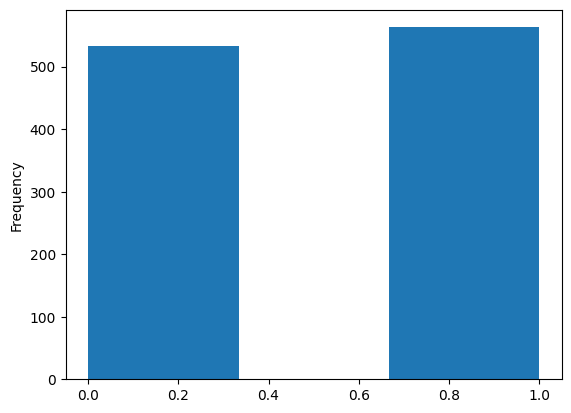

In [10]:
df_final_data["next_day_price_direction"].plot(kind="hist", bins=3)


In [11]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 2000)

df_final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Columns: 135 entries, accumulation_phase to next_day_price_movement
dtypes: float64(90), int64(42), object(3)
memory usage: 1.1+ MB


In [12]:
df_final_data.select_dtypes(include=['object']).columns


Index(['activity_level', 'block_date', 'next_day_price_movement'], dtype='object')

In [13]:
corr = df_final_data.corr(numeric_only=True)["next_day_price_direction"].abs().sort_values(ascending=False)
corr.head(20)


next_day_price_direction       1.0000
next_day_return                0.6873
bullish_signal                 0.0810
volume_vs_ma7                  0.0710
volume_change_pct              0.0704
avg_whale_tx_size_weth         0.0694
eth_daily_return               0.0686
eth_log_return                 0.0684
btc_daily_return               0.0664
volume_vs_ma30                 0.0662
btc_log_return                 0.0659
whale_net_exchange_flow_weth   0.0611
volume_zscore_30d              0.0598
mega_whale_ratio               0.0572
volume_zscore_7d               0.0535
tx_count_vs_ma7                0.0534
btc_return_lag1                0.0519
volume_spike_7d                0.0507
distribution_phase             0.0504
eth_btc_divergence             0.0504
Name: next_day_price_direction, dtype: float64

### Training The Models
- Imports & Setup

In [14]:
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")



- Model Class

In [39]:
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

class ETHPricePredictorEnhanced:
    """Enhanced Ethereum Whale Activity → Next-Day Price Direction Model"""

    def __init__(self, target="next_day_price_direction"):
        self.target = target
        self.model = None
        self.scaler = StandardScaler()
        self.label_encoder = None
        self.feature_names = None
        self.performance_history = []

    # -------------------------------------------------------------
    # ENHANCED FEATURE ENGINEERING
    # -------------------------------------------------------------
    def create_additional_features(self, df):
        """Create technical indicators and lag features"""
        data = df.copy()
        
        # Price-based features
        if 'eth_daily_return' in data.columns:
            # Rolling volatility
            data['eth_volatility_3d'] = data['eth_daily_return'].rolling(3).std()
            data['eth_volatility_7d'] = data['eth_daily_return'].rolling(7).std()
            
            # Momentum indicators
            data['eth_momentum_3d'] = data['eth_daily_return'].rolling(3).mean()
            data['eth_momentum_7d'] = data['eth_daily_return'].rolling(7).mean()
            
            # Price position relative to recent range
            if 'eth_price' in data.columns:
                data['price_position_7d'] = (data['eth_price'] - data['eth_price'].rolling(7).min()) / \
                                          (data['eth_price'].rolling(7).max() - data['eth_price'].rolling(7).min())
        
        # Whale activity interactions
        if all(col in data.columns for col in ['net_flow', 'tx_count']):
            data['flow_per_tx'] = data['net_flow'] / (data['tx_count'] + 1)  # Avoid division by zero
            data['large_flow_indicator'] = (data['net_flow'] > data['net_flow'].rolling(30).quantile(0.75)).astype(int)
        
        # Market regime features
        if 'btc_daily_return' in data.columns and 'eth_daily_return' in data.columns:
            data['market_correlation_7d'] = data['eth_daily_return'].rolling(7).corr(data['btc_daily_return'])
            data['outperformance_rolling'] = data['eth_outperformance'].rolling(7).mean()
        
        return data

    def prepare_features(self, df):
        print("Preparing features with enhanced engineering...")

        data = df.copy()

        # Convert time and sort
        if "block_date" in data.columns:
            data["block_date"] = pd.to_datetime(data["block_date"])
            data = data.sort_values("block_date")

        # Create additional features
        data = self.create_additional_features(data)

        # Encode categorical variable
        if "activity_level" in data.columns:
            le = LabelEncoder()
            data["activity_level"] = le.fit_transform(data["activity_level"])
            self.label_encoder = le

        # Remove target leakage - expanded list
        leakage_cols = [
            "next_day_return", "next_day_price", "next_day_price_movement",
            "block_date", "eth_price_next_day", "target", "price_direction"
        ]
        data = data.drop(columns=[c for c in leakage_cols if c in data.columns])

        # Features = all numeric except target
        feature_cols = [
            col for col in data.columns
            if col != self.target and pd.api.types.is_numeric_dtype(data[col])
        ]

        # Enhanced missing value handling
        data[feature_cols] = (
            data[feature_cols]
            .replace([np.inf, -np.inf], np.nan)
        )
        
        # Forward fill then median impute
        data[feature_cols] = data[feature_cols].fillna(method='ffill').fillna(data[feature_cols].median())

        print(f"Generated {len(feature_cols)} features")
        return data, feature_cols

    # -------------------------------------------------------------
    # ENHANCED TIME SPLIT WITH CROSS-VALIDATION
    # -------------------------------------------------------------
    def time_series_cv_split(self, X, y, n_splits=5):
        """Time Series Cross Validation"""
        tscv = TimeSeriesSplit(n_splits=n_splits)
        splits = []
        
        for train_idx, val_idx in tscv.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            splits.append((X_train, X_val, y_train, y_val))
        
        return splits

    def time_split(self, X, y):
        N = len(X)
        val_size = test_size = int(N * 0.20)
        train_size = N - val_size - test_size
        
        if train_size <= 0:
            raise ValueError("Dataset too small for 60/20/20 split.")

        X_train, y_train = X[:train_size], y[:train_size]
        X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
        X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

        print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")
        return X_train, X_val, X_test, y_train, y_val, y_test

    # -------------------------------------------------------------
    # ENHANCED MODEL CANDIDATES WITH CLASS IMBALANCE HANDLING
    # -------------------------------------------------------------
    def get_model_candidates(self):
        return {
            "log_reg": LogisticRegression(
                max_iter=2000, 
                class_weight='balanced',
                C=0.1,
                random_state=42
            ),
            "random_forest": RandomForestClassifier(
                n_estimators=500,
                max_depth=10,
                min_samples_split=20,
                min_samples_leaf=10,
                class_weight='balanced_subsample',
                random_state=42,
                n_jobs=-1
            ),
            "xgboost": XGBClassifier(
                n_estimators=300,
                max_depth=8,
                learning_rate=0.05,
                subsample=0.8,
                colsample_bytree=0.8,
                scale_pos_weight=1,  # Will be adjusted based on class imbalance
                objective="binary:logistic",
                random_state=42,
                n_jobs=-1
            )
        }

    # -------------------------------------------------------------
    # ENHANCED TRAINING WITH CROSS-VALIDATION
    # -------------------------------------------------------------
    def handle_class_imbalance(self, X, y):
        """Apply SMOTE for class imbalance"""
        try:
            from imblearn.over_sampling import SMOTE
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X, y)
            print(f"Class distribution after SMOTE: {pd.Series(y_resampled).value_counts().to_dict()}")
            return X_resampled, y_resampled
        except ImportError:
            print("imblearn not available, using original data")
            return X, y

    def train(self, df):
        print("="*70)
        print("ENHANCED ETH PRICE DIRECTION MODEL TRAINING")
        print("="*70)

        # Prepare data
        data, feature_cols = self.prepare_features(df)
        data = data.dropna(subset=[self.target])

        X = data[feature_cols].values
        y = data[self.target].values
        self.feature_names = feature_cols

        print(f"Class distribution: {pd.Series(y).value_counts().to_dict()}")

        # Split
        X_train, X_val, X_test, y_train, y_val, y_test = self.time_split(X, y)

        # Scale features
        self.scaler.fit(X_train)
        X_train_scaled = self.scaler.transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)
        X_test_scaled = self.scaler.transform(X_test)

        # Handle class imbalance
        X_train_balanced, y_train_balanced = self.handle_class_imbalance(X_train_scaled, y_train)

        # Adjust XGBoost scale_pos_weight based on class imbalance
        class_ratio = np.sum(y_train == 0) / np.sum(y_train == 1) if np.sum(y_train == 1) > 0 else 1
        candidates = self.get_model_candidates()
        candidates["xgboost"].set_params(scale_pos_weight=class_ratio)

        # Cross-validation evaluation
        print("\n🔍 Performing cross-validation...")
        best_model = None
        best_score = -1

        for name, model in candidates.items():
            print(f"\nTesting model: {name}")
            cv_scores = []
            
            # Simple time-aware validation
            model.fit(X_train_balanced, y_train_balanced)
            val_preds = (model.predict_proba(X_val_scaled)[:, 1] > 0.5).astype(int)
            
            acc = accuracy_score(y_val, val_preds)
            auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
            
            print(f"Validation Accuracy: {acc:.4f}, AUC: {auc:.4f}")
            
            # Use AUC as primary metric (better for imbalanced data)
            if auc > best_score:
                best_score = auc
                best_model = model

        print(f"\n🔥 Best model: {best_model.__class__.__name__} (AUC: {best_score:.4f})")

        # Retrain on full 80% with balanced data
        print("\nRetraining best model on 80% of data (train + val)...")
        X_full_train = np.vstack([X_train, X_val])
        y_full_train = np.concatenate([y_train, y_val])
        
        self.scaler.fit(X_full_train)
        X_full_train_scaled = self.scaler.transform(X_full_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Balance the full training set
        X_full_balanced, y_full_balanced = self.handle_class_imbalance(X_full_train_scaled, y_full_train)
        
        best_model.fit(X_full_balanced, y_full_balanced)
        self.model = best_model

        # Comprehensive evaluation
        print("\n" + "="*50)
        print("COMPREHENSIVE TEST EVALUATION")
        print("="*50)
        self.evaluate_comprehensive(X_test_scaled, y_test)

        # Feature importance analysis
        self.analyze_features()

    def evaluate_comprehensive(self, X_test, y_test):
        """Enhanced evaluation with multiple metrics"""
        y_pred_proba = self.model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)
        
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)
        
        print(f"Test Accuracy: {acc:.4f}")
        print(f"Test AUC: {auc:.4f}")
        print(f"Test F1-Score: {classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']:.4f}")
        print("\nDetailed Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")
        print(cm)
        
        # Store performance
        self.performance_history.append({
            'accuracy': acc,
            'auc': auc,
            'timestamp': datetime.now()
        })

    def analyze_features(self):
        """Comprehensive feature analysis"""
        if hasattr(self.model, "feature_importances_"):
            imp = pd.Series(self.model.feature_importances_, index=self.feature_names)
            top_features = imp.sort_values(ascending=False).head(20)
            
            print("\n" + "="*30)
            print("TOP 20 FEATURES")
            print("="*30)
            for feat, importance in top_features.items():
                print(f"{feat:<30} {importance:.4f}")
            
            # Feature importance visualization would go here
            return top_features
        else:
            print("Model does not expose feature importances.")
            return None

    def save_model(self, filepath="models/enhanced_model.pkl"):
        """Save model with metadata"""
        print(f"Saving enhanced model → {filepath}")

        model_dict = {
            "model": self.model,
            "scaler": self.scaler,
            "label_encoder": self.label_encoder,
            "feature_names": self.feature_names,
            "target": self.target,
            "performance_history": self.performance_history,
            "trained_date": datetime.now().isoformat(),
        }

        with open(filepath, "wb") as f:
            pickle.dump(model_dict, f)

        print("Enhanced model saved.")

# Try the enhanced version
print("Training enhanced model...")
enhanced_predictor = ETHPricePredictorEnhanced(target="next_day_price_direction")
enhanced_predictor.train(df)
enhanced_predictor.save_model("models/enhanced_model.pkl")

Training enhanced model...
ENHANCED ETH PRICE DIRECTION MODEL TRAINING
Preparing features with enhanced engineering...
Generated 137 features
Class distribution: {1: 563, 0: 533}
Train: 658, Validation: 219, Test: 219
Class distribution after SMOTE: {1: 338, 0: 338}

🔍 Performing cross-validation...

Testing model: log_reg
Validation Accuracy: 0.4840, AUC: 0.4850

Testing model: random_forest
Validation Accuracy: 0.5297, AUC: 0.5261

Testing model: xgboost
Validation Accuracy: 0.4977, AUC: 0.5055

🔥 Best model: RandomForestClassifier (AUC: 0.5261)

Retraining best model on 80% of data (train + val)...
Class distribution after SMOTE: {1: 446, 0: 446}

COMPREHENSIVE TEST EVALUATION
Test Accuracy: 0.5342
Test AUC: 0.5796
Test F1-Score: 0.4885

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.86      0.63       102
           1       0.67      0.25      0.36       117

    accuracy                           0.53       219

In [38]:
# Load data and train model
df = pd.read_csv("whale_prices_ml_ready.csv")

predictor = ETHPricePredictor(target="next_day_price_direction")
predictor.train(df)
predictor.save_model("models/model.pkl")

TRAINING ETH PRICE DIRECTION MODEL
Preparing features...
Train: 658, Validation: 219, Test: 219

🔍 Testing model: log_reg
Validation Accuracy: 0.4977

🔍 Testing model: random_forest
Validation Accuracy: 0.5205

🔍 Testing model: xgboost
Validation Accuracy: 0.4703

🔥 Best model selected: RandomForestClassifier

Retraining best model on 80% of data (train + val)...

============== FINAL TEST EVALUATION ==============
Test Accuracy: 0.4932

              precision    recall  f1-score   support

           0       0.48      0.84      0.61       102
           1       0.58      0.19      0.28       117

    accuracy                           0.49       219
   macro avg       0.53      0.52      0.45       219
weighted avg       0.53      0.49      0.43       219


== TOP 20 FEATURES ==

tx_count_change_pct               0.0146
eth_daily_return                  0.0145
eth_log_return                    0.0143
btc_return_lag1                   0.0133
eth_volatility_7d                 0.0130
se